In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn as sns
x = np.linspace(-4, 4, 100)
tencent_blue = (0,0.3215686274509804,0.8509803921568627)
tencent_orange = (0.9333333333333333, 0.49411764705882355, 0.2784313725490196)


# Calculate y-values for the standard normal density curve
y_standard_normal = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x**2)

In [2]:
# import glob
# result_pd = pd.DataFrame()
# for f in glob.glob("results/*ebd*"):
#     df = pd.read_csv(f)
#     result_pd = pd.concat([result_pd, df])

In [3]:
result_pd = pd.read_csv("PaperResult/result_AB_more_biased_plugin.csv")
print(len(result_pd))

129


In [4]:
result_pd.head()

,Unnamed: 0.1,Unnamed: 0,debias_point,debias_var,dim,dim_var,undebias_point,undebias_var,J,Q,K,M,epochs,n_folds,uplift_factor,truth,truth_stderr
0,0,0,-0.010891,0.210806,-0.003909,1.685451,-0.007922,0.001106,500,1000,3,500,500,3,0.1,0.002142,0.000377
1,0,0,0.010335,0.183627,-0.041941,1.547373,0.012185,0.001029,500,1000,3,500,500,3,0.1,0.001621,0.000372
2,0,0,0.008341,0.229381,0.004745,1.585277,0.003190,0.001559,500,1000,3,500,500,3,0.1,0.001720,0.000373
3,0,0,-0.003780,0.225432,-0.044192,1.501486,-0.000605,0.001561,500,1000,3,500,500,3,0.1,0.001420,0.000377
4,0,0,-0.026138,0.249231,-0.001225,1.648905,-0.012659,0.002165,500,1000,3,500,500,3,0.1,0.001666,0.000383


In [5]:
truth =  result_pd['truth']
debias_B_true = np.array(result_pd['debias_point'])
debias_var_B_true = np.array(result_pd['debias_var'])
dim_B =  np.array(result_pd['dim'])
dim_var_B =  np.array(result_pd['dim_var'])
undebias_B_true =  np.array(result_pd['undebias_point'])
undebias_var_B_true = np.array(result_pd['undebias_var'])
Q = result_pd['Q'].values[0]
n_folds = 3

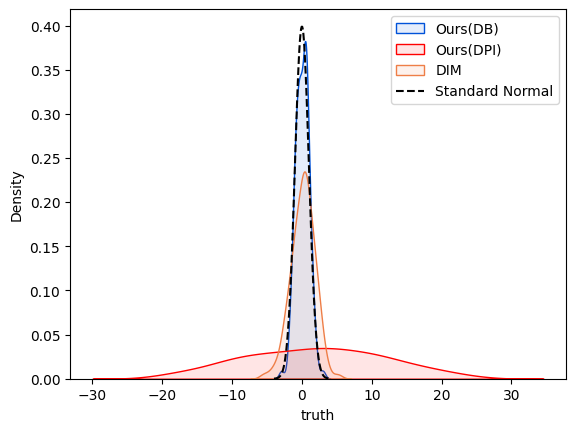

In [6]:
plt.figure() 
sns.kdeplot((np.array(debias_B_true) - truth) /  np.sqrt(np.array(debias_var_B_true)/(int(Q))) , fill = True,color=tencent_blue,label = "Ours(DB)",alpha=0.1)
sns.kdeplot((np.array(undebias_B_true)- truth) /  np.sqrt(np.array(undebias_var_B_true)/(int(Q))) , fill = True,color='red',label = "Ours(DPI)",alpha=0.1)
sns.kdeplot((np.array(dim_B) - truth) / np.sqrt(np.array(dim_var_B) / int(Q)), fill = True,color=tencent_orange,label = "DIM",alpha=0.1)
plt.plot(x, y_standard_normal, color='black', label="Standard Normal", ls='--')
plt.legend()
# plt.savefig("AB_plot_11063000.png")


In [7]:
def print_statistics(name_est, name_var, df):
    bias = np.mean(df[name_est]-df['truth'].mean()) 
    mc_std = np.std(df[name_est]-df['truth'].mean())
    estimate_std = np.mean(np.sqrt(df[name_var]/(int(df['Q'][0]))))
    print(f"Estimator {name_est}, bias {bias}, mc std {mc_std}, estimate std {estimate_std}")

In [8]:
print_statistics('debias_point', 'debias_var', result_pd)

Estimator debias_point, bias 0.00034690856311309255, mc std 0.013891260195304933, estimate std 0.014822041547968847


In [9]:
print_statistics('undebias_point', 'undebias_var', result_pd)

Estimator undebias_point, bias 0.002484836973521793, mc std 0.011649396888362229, estimate std 0.0011465179829017321


In [10]:
print_statistics('dim', 'dim_var', result_pd)

Estimator dim, bias 0.0036734518186562135, mc std 0.06665335287661321, estimate std 0.03953295593494646
